# Centrální limitní věta

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

Porovnáme histogram součtu $n$ nezávislých exponenciálních veličin s aproximací na základě centrální limitní věty.

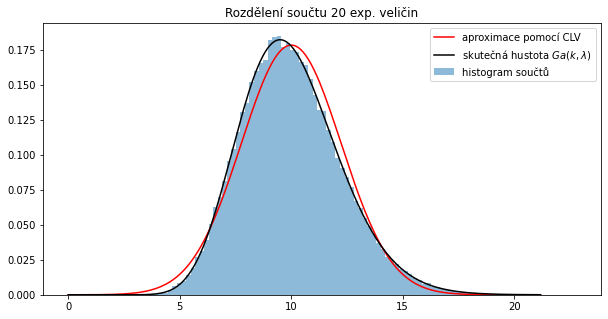

In [60]:
k   = 20    # počet sčítanců   
lam = 2      # parametr exponenciálních veličin
N   = 100000 # počet realizací součtů

# N náhodnýhc vzorky součtů k exponenciálních veličin
r = stats.expon.rvs(scale=1/lam, size=(k, N)).sum(axis=0)

mu     = k*1/lam      # střední hodnota součtu
sigma2 = k*1/lam**2   # rozptyl součtu

plt.figure(figsize=(10, 5))
plt.hist(r, bins=100, density=True, alpha=0.5, label='histogram součtů');
xs = np.linspace(0, mu+5*sigma2**0.5, 200)
plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma2**0.5), color='red', label='aproximace pomocí CLV')
plt.plot(xs, stats.gamma.pdf(xs, k, scale=1/lam), 'k', label='skutečná hustota $Ga(k, \lambda)$')
plt.title('Rozdělení součtu {} exp. veličin'.format(k))
plt.legend();

In [49]:
stats.gamma?

Signature:       stats.gamma(*args, **kwds)
Type:            gamma_gen
String form:     <scipy.stats._continuous_distns.gamma_gen object at 0x7fc450882460>
File:            ~/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A gamma continuous random variable.

As an instance of the `rv_continuous` class, `gamma` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(a, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, a, loc=0, scale=1)
    Probability density function.
logpdf(x, a, loc=0, scale=1)
    Log of the probability density function.
cdf(x, a, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, a, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, a, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x